In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KMCLib import *

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

from KMCAnalysis_single_trajectory import *
from gradient_color_line import *

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

# -----------------------------------------------------------------------------
# KMCLib version 2.0-a1
# Distributed under the GPLv3 license
# Copyright (C)  2012-2016  Mikael Leetmaa
# Developed by Mikael Leetmaa <leetmaa@kth.se>
#
# This program is distributed in the hope that it will be useful
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# LICENSE and README files, and the source code, for details.
#
# You should have received a copy of the GNU General Public License version 3
# (GPLv3) along with this program. If not, see <http://www.gnu.org/licenses/>.
# -----------------------------------------------------------------------------



In [2]:
# Define a squared unit cell.
cell_vectors = [[   1.0000000e+00,   0.000000e+00,   0.000000e+00],
                [   0.000000e+00,   1.000000e+00,   0.000000e+00],
                [   0.000000e+00,   0.000000e+00,   1.000000e+00]]
# idk what this does
basis_points = [[   0.000000e+00,   0.000000e+00,   0.000000e+00]]
unit_cell = KMCUnitCell(cell_vectors=cell_vectors,
                        basis_points=basis_points)

In [3]:
# Define the lattice
size = 5
lattice = KMCLattice(unit_cell=unit_cell,
                     repetitions=(size,size,1),
                     periodic=(True, True, False))

In [4]:
# Generate the initial configuration array
types = ['E']*(size*size)
# index of a random non-border site
xr,yr = np.random.randint(1,size-2),np.random.randint(1,size-2)
# first particle
types[xr+size*yr] = 'P'
# second, neighboring one
types[xr-1+size*yr] = 'P'
config = KMCConfiguration(lattice=lattice,
                          types=types,
                          possible_types=['E','P'])
print(config._script())


# -----------------------------------------------------------------------------
# Unit cell

cell_vectors = [[   1.000000e+00,   0.000000e+00,   0.000000e+00],
                [   0.000000e+00,   1.000000e+00,   0.000000e+00],
                [   0.000000e+00,   0.000000e+00,   1.000000e+00]]

basis_points = [[   0.000000e+00,   0.000000e+00,   0.000000e+00]]

unit_cell = KMCUnitCell(
    cell_vectors=cell_vectors,
    basis_points=basis_points)

# -----------------------------------------------------------------------------
# Lattice

lattice = KMCLattice(
    unit_cell=unit_cell,
    repetitions=(5,5,1),
    periodic=(True, True, False))

# -----------------------------------------------------------------------------
# Configuration

types = ['E','E','E','E','E','E','E','E','E','E','P','P','E',
         'E','E','E','E','E','E','E','E','E','E','E','E']

possible_types = ['E','P']

configuration = KMCConfiguration(
    lattice=lattice,
    types=types,
    possible_types=possible_type

In [5]:
# Setup a diffusion process to the left.
#  P1,P2,*, ->  P2,P1,*
#                   center site      second site on 1 third site on 2
coordinates_p0 = [[0.0, 0.0, 0.0],[0.0, 1.0, 0.0],[0.0,2.0,0.0]]
p0 = KMCProcess(coordinates=coordinates_p0,
                elements_before=['P','P','E'],
                elements_after=['E','P','P'],
                move_vectors=None,
                basis_sites=[0],
                rate_constant=1.)
# Setup a diffusion process to the right.
#  *,P1,P2 ->  P2,P1,*
#                   center site      second site on 1 third site on 2
coordinates_p0 = [[0.0, 0.0, 0.0],[0.0, -1.0, 0.0],[0.0,-2.0,0.0]]
p1 = KMCProcess(coordinates=coordinates_p0,
                elements_before=['P','P','E'],
                elements_after=['E','P','P'],
                move_vectors=None,
                basis_sites=[0],
                rate_constant=1.)
# Setup a diffusion process to the top.
#  P1,P2,*, ->  P2,P1,*
#                   center site      second site on 1 third site on 2
coordinates_p0 = [[0.0, 0.0, 0.0],[1.0, 0.0, 0.0],[2.0,0.0,0.0]]
p2 = KMCProcess(coordinates=coordinates_p0,
                elements_before=['P','P','E'],
                elements_after=['E','P','P'],
                move_vectors=None,
                basis_sites=[0],
                rate_constant=1.)
# Setup a diffusion process to the bottom.
#  *,P1,P2 ->  P2,P1,*
#                   center site      second site on 1 third site on 2
coordinates_p0 = [[0.0, 0.0, 0.0],[-1.0, 0.0, 0.0],[-2.0,0.0,0.0]]
p3 = KMCProcess(coordinates=coordinates_p0,
                elements_before=['P','P','E'],
                elements_after=['E','P','P'],
                move_vectors=None,
                basis_sites=[0],
                rate_constant=1.)
# Setup a diffusion process to the bottom.
#  *,P1,P2 ->  P2,P1,*
#                   center site      second site on 1 third site on 2
coordinates_p0 = [[0.0, 0.0, 0.0],[-1.0, 0.0, 0.0],[-2.0,0.0,0.0]]
p3 = KMCProcess(coordinates=coordinates_p0,
                elements_before=['P','P','E'],
                elements_after=['E','P','P'],
                move_vectors=None,
                basis_sites=[0],
                rate_constant=1.)
# Construct the interactions object.
interactions = KMCInteractions(processes=[p0,p1])#,p2,p3])

In [6]:
# Generate the KMC model to run.
model = KMCLatticeModel(configuration=config,
                        interactions=interactions)
control_parameters = KMCControlParameters(number_of_steps=100,
                                          dump_interval=10,
                                          analysis_interval=1,
                                          seed=None)
# generate the analysis object
MyAnalysis = [SingleTrajectory('P',
                              control_parameters.analysisInterval(),
                              control_parameters.numberOfSteps())]

In [7]:
model.run(control_parameters,trajectory_filename='test.py',
          trajectory_type='lattice',
          analysis = MyAnalysis)

 KMCLib: setting up the backend C++ object.
[10 11]
 KMCLib: Runing for 100 steps, starting from time: 0.000000

 KMCLib: 10 steps executed. time:     6.4454279409e+00 
 KMCLib: 20 steps executed. time:     1.0331387194e+01 
 KMCLib: 30 steps executed. time:     1.7363426985e+01 
 KMCLib: 40 steps executed. time:     2.2561406104e+01 
 KMCLib: 50 steps executed. time:     2.7178050560e+01 
 KMCLib: 60 steps executed. time:     3.2544112096e+01 
 KMCLib: 70 steps executed. time:     3.7881536928e+01 
 KMCLib: 80 steps executed. time:     4.2150751920e+01 
 KMCLib: 90 steps executed. time:     4.5421816406e+01 
 KMCLib: 100 steps executed. time:     5.2213449059e+01 


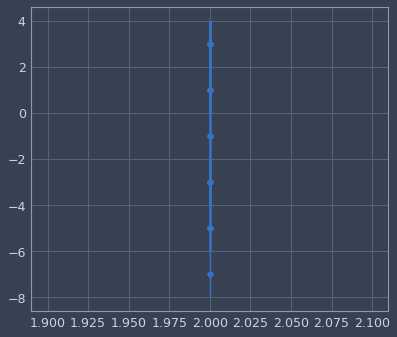

In [8]:
plt.plot(MyAnalysis[0].results()[0][:,0], 
        MyAnalysis[0].results()[0][:,1])
plt.scatter(MyAnalysis[0].results()[1][:,0], 
        MyAnalysis[0].results()[1][:,1])